In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from statsmodels.tsa.stattools import acf as acf
my_color_palette =  {'Dz 5mg/kg':'#8FB996','NaCl':'#594157', 'PTZ 20mg/kg':'#c7991a'}
cnd_order = ['PTZ 20mg/kg','NaCl','Dz 5mg/kg']
Sampling_freq = 2000

In [2]:
# Load LFP data
Exemple_LFP_df = pd.read_pickle('Mice_data/'+'Exemple_LFP_CA1 R')
print(Exemple_LFP_df)

     Condition                                                LFP
0         NaCl  [-8.802062113246695, -3.9100630513226804, 1.62...
1    Dz 5mg/kg  [22.861481152996333, 25.901793358100665, 29.34...
2  PTZ 20mg/kg  [9.901605352058834, 12.182860123863104, 14.473...


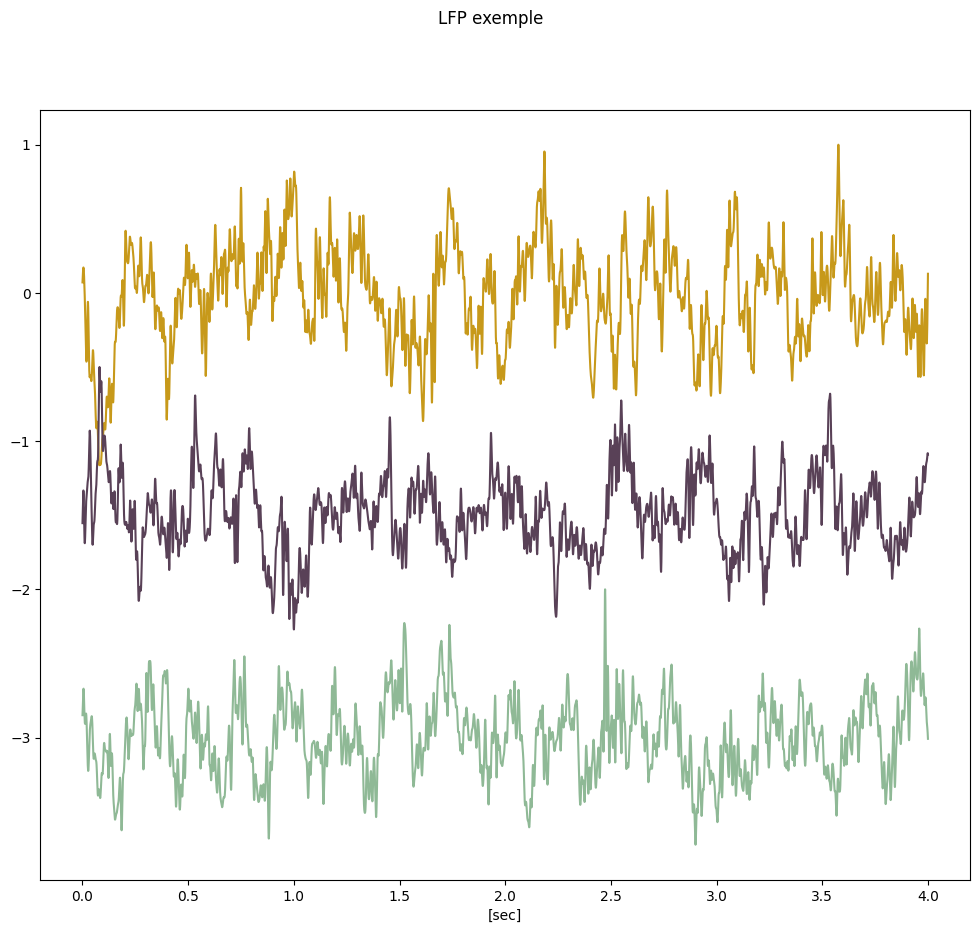

In [3]:
# Plot LFP exemple
title = 'LFP exemple'
fig = plt.figure(title, figsize=(12, 10)).suptitle(title)
ax1 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
ax1.set_xlabel('[sec]')
for i, cnd in enumerate(cnd_order):
    LFP = Exemple_LFP_df[(Exemple_LFP_df['Condition']==cnd)]['LFP'].values[0]
    norm_LFP = LFP / np.max(LFP)
    x = np.arange(0, len(LFP)/Sampling_freq, 1/Sampling_freq)
    ax1.plot(x, norm_LFP-1.5*i, c=my_color_palette[cnd], label=cnd)

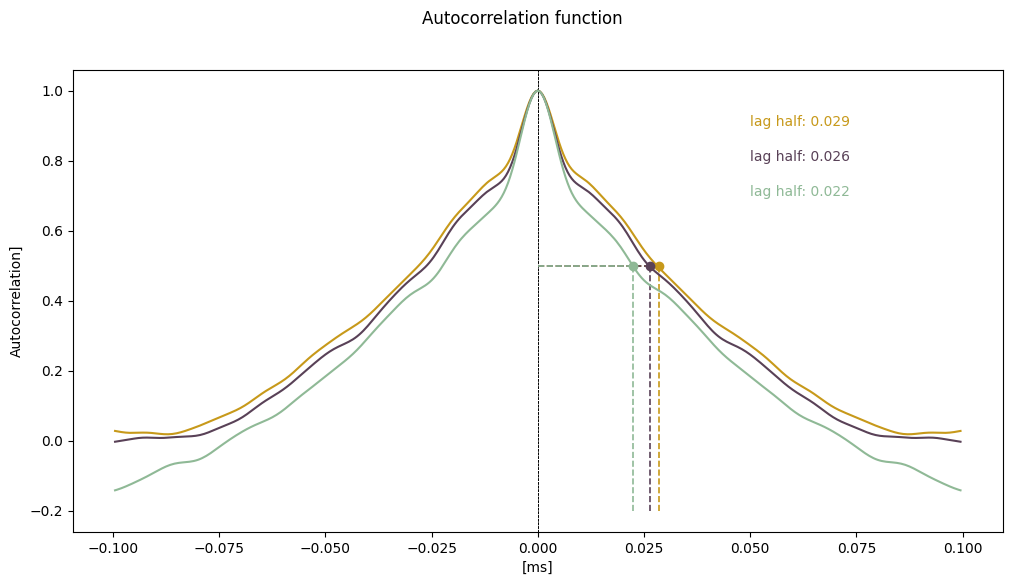

In [4]:
# Calculate and plot autocorrelation
title = 'Autocorrelation function'
fig = plt.figure(title, figsize=(12, 6)).suptitle(title)
ax2 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
ax2.set_xlabel('[ms]')
ax2.set_ylabel('Autocorrelation]')
for i, cnd in enumerate(cnd_order):
    LFP = Exemple_LFP_df[(Exemple_LFP_df['Condition']==cnd)]['LFP'].values[0]
    autocorr = acf(LFP , nlags=len(LFP)/2)
    lag_half = np.min(np.argwhere(autocorr < 0.5))
    ax2.axvline(x=0, linestyle="dashed", linewidth=0.5, color='k')
    ax2.plot(x[:200], autocorr[:200], color=my_color_palette[cnd])
    ax2.plot(-x[:200],autocorr[:200], color=my_color_palette[cnd])
    ax2.plot([lag_half / 2000,lag_half / 2000], [-0.2,0.5], linestyle="dashed", linewidth=1.2,color=my_color_palette[cnd])
    ax2.plot([0,lag_half / 2000], [0.5,0.5],linestyle="dashed", linewidth=1.2, color=my_color_palette[cnd])
    ax2.plot(lag_half / 2000,0.5,'o',color=my_color_palette[cnd])
    ax2.text(0.05, 0.9-i*0.1, 'lag half: ' + str(f'{lag_half/2000:.3f}'), size=10, color=my_color_palette[cnd])


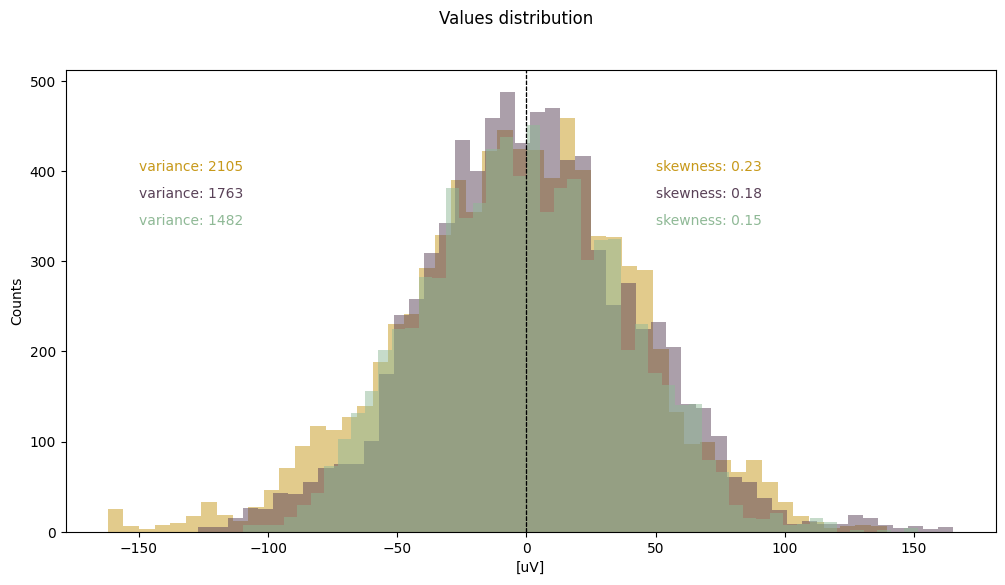

In [60]:
# Calculate and plot varaince and skewnwss
title = 'Values distribution'
fig = plt.figure(title, figsize=(12, 6)).suptitle(title)
ax4 = plt.subplot2grid((12, 12), (0, 0), rowspan=12, colspan=12)
ax4.set_xlabel('[uV]')
ax4.set_ylabel('Counts')
for i, cnd in enumerate(cnd_order):
    LFP = Exemple_LFP_df[(Exemple_LFP_df['Condition']==cnd)]['LFP'].values[0]
    ax4.hist(LFP, 50, alpha=0.5, color=my_color_palette[cnd])
    
    variance = np.var(LFP)
    skewness = np.abs(stats.skew(LFP, bias=False))
    ax4.text(-150, 400 -(i*30), 'variance: ' + str(f'{variance:.0f}'), size=10, color=my_color_palette[cnd])
    ax4.text(50, 400 -(i*30), 'skewness: ' + str(f'{skewness:.2f}'), size=10, color=my_color_palette[cnd])
    ax4.axvline(x=0, linestyle="dashed", linewidth=0.8, color='k')
